----------------


# $\qquad\qquad\qquad\qquad$ DISCRETE INVERSE PROBLEMS

## $$\color{red}{\mathbf{\textbf{ML IN TOMOGRAPHY}}}$$ 

------------

### $\color{pink}{\text{Maris Ioannis}}$ 
### $\color{pink}{\text{2022}}$

In [1]:
#Include some software

import numpy as np
from pandas import DataFrame
from numpy.linalg import inv, norm
from sympy import Matrix, latex, symbols, Symbol
import matplotlib.pyplot as plt
#init_printing()


In [2]:
class Tomography:
    
    s_air = 1/330
    c_air = 330  #m/sec
    
    def __init__(self,angle,time):
        self.angle = angle
        self.time = time
        
    def __repr__(self):
        K_ang = ['(Angle_' + str(i+1) + ') ' + str(Angle[i]) for i in range(len(Angle))]
        V_tim = ['(time_' + str(i+1) + ') ' + str(Time_msec[i]) for i in range(len(Time_msec))]
        return f'{dict(zip(K_ang,V_tim))}'
    
    def data_frame(self):
        Time_sec = np.array(self.time) * 10**-3
        df = DataFrame([self.angle,np.array(self.angle)*(np.pi/180), self.time,Time_sec],
         index = ['Angle (deg)','Angle (rad)','Time (msec)', 'Time (sec)']).T
        return df
    
    def plot(self):
        plt.plot(self.time, self.angle,'.', color='black')
        plt.xlabel('$\mathbf{Time}$ (msec)')
        plt.ylabel('$\mathbf{Angle}$ (degrees)')
        plt.show()
    
    
    def Ray_points(self,x):
        Ly = lambda y,deg: (y,np.tan(deg*(np.pi/180))*y)
        Lx = lambda x,deg: (x/np.tan(deg*(np.pi/180)),x)
        X = [list(filter(lambda x: 1<=x[0]<=5 and 1<=x[1]<=5 ,
         [Lx(i,self.angle[j]) for i in range(1,5+1)])) for j in range(15)]
        Y = [list(filter(lambda x: 5 >= x[1] >=1 and 1<=x[0]<=5 ,
         [Ly(i,self.angle[j]) for i in range(1,5+1)] )) for j in range(15) ]
        Z = [X[i]+Y[i] for i in range(len(X))] 
        Ray = lambda i: sorted(Z[i])
        return Ray(x)
        
    def Ray_dist_in(self):
        
        Ly = lambda y,deg: (y,np.tan(deg*(np.pi/180))*y)
        Lx = lambda x,deg: (x/np.tan(deg*(np.pi/180)),x)
        
        
        X = [list(filter(lambda x: 1<=x[0]<=5 and 1<=x[1]<=5 ,
         [Lx(i,self.angle[j]) for i in range(1,5+1)])) for j in range(15)]
        
        Y = [list(filter(lambda x: 5 >= x[1] >=1 and 1<=x[0]<=5 ,
         [Ly(i,self.angle[j]) for i in range(1,5+1)] )) for j in range(15) ]
        
        Z = [X[i]+Y[i] for i in range(len(X))] # intersection points of the line_i with the squares
        
        Ray = lambda i: sorted(Z[i])
        
        point_dist = lambda P: np.sqrt((P[1][0] - P[0][0])**2 + (P[1][1] - P[0][1])) 
        #i.e P = ((0,0), (1,1)) --> sqrt(2)
        
        POINTS = lambda x : [(Ray(x)[i],Ray(x)[i+1]) for i in range(len(Ray(x))-1)] #pair points
        DIST_OF_ALL = [list(map(point_dist, POINTS(i))) for i in range(15)]     #all the dists of the pairs
        
        DOA = [DIST_OF_ALL[i][j] for i in range(15) for j in range(len(DIST_OF_ALL[i]))]
        
        counter_of_h_i = sum(list(map(len, DIST_OF_ALL)))
        
        L = dict(zip(['h_'+str(i) for i in range(1,counter_of_h_i+1)], DOA)) 
        
        H_val = list(L.values())[:29-1] + 4*[np.sqrt(2)] + list(L.values())[35:]
        
        H = dict(zip(['h_'+str(i+1) for i in range(len(H_val))], H_val))
        
        return H
    
    def Ray_dist_out(self, Dict=None):
        point_dist = lambda P: np.sqrt((P[1][0] - P[0][0])**2 + (P[1][1] - P[0][1])) 
        min_max = lambda points_arr: [min(points_arr)] + [max(points_arr)]  #keeps only the min,max points
        min_max_Dist = [min_max(self.Ray_points(i)) for i in range(15)]
        output = 8 - np.array(list(map(point_dist, min_max_Dist)))
        
        if Dict != None:
            return dict(zip(['h_'+str(i+1)+'^out' for i in range(15)], output)) #as a dict
        
        return output #dist of the ray out of the testing blocks
    
    def time_out(self):
        return dict(zip(['t_'+str(i+1)+'^out' for i in range(15)], self.Ray_dist_out()/330))

    def time_in_minus_out(self, Dict=None):
        output = np.array(self.time) - np.array(list(self.time_out().values()))
        if Dict != None:
            return dict(zip(['t\'_'+str(i+1) for i in range(15)], output))
        return output
    
    def data_frame_all(self):
        Time_sec = np.array(self.time) * 10**-3
        df = DataFrame([self.angle,np.array(self.angle)*(np.pi/180), self.time,
                        Time_sec, self.Ray_dist_out(), list(self.time_out().values()),self.time_in_minus_out()],
         index = ['Angle (deg)','Angle (rad)','Time (msec)', 'Time (sec)',
                  '$h^{out}$','$t^{out}$','t \'']).T
        return df
        
    

In [3]:
#Data_set
Angle = [
    12,15,18,23,32,36,42,45,50,55,60,65,70,75,78
]
Time_msec = [
    22.42,20.59,18.628,16.214,13.112,11.695,9.62,8.358,10.335,12.006,13.822,15.48,17.189,20.58,23.22
]

Tom_test = Tomography(Angle,Time_msec)
#Tom_test

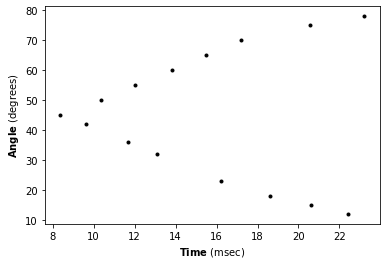

In [4]:
Tom_test.plot()

In [5]:
Tom_test.data_frame()

,Angle (deg),Angle (rad),Time (msec),Time (sec)
0,12.0,0.209440,22.420,0.022420
1,15.0,0.261799,20.590,0.020590
2,18.0,0.314159,18.628,0.018628
3,23.0,0.401426,16.214,0.016214
4,32.0,0.558505,13.112,0.013112
5,36.0,0.628319,11.695,0.011695
6,42.0,0.733038,9.620,0.009620
7,45.0,0.785398,8.358,0.008358
8,50.0,0.872665,10.335,0.010335
9,55.0,0.959931,12.006,0.012006


In [6]:
dd = Tom_test.Ray_dist_in()
dd

{'h_1': 0.3873321321254156,
 'h_2': 0.3789373819630117,
 'h_3': 1.1260325006104943,
 'h_4': 1.0725420469749316,
 'h_5': 1.1510515610661871,
 'h_6': 0.829668984139862,
 'h_7': 1.1935136430764437,
 'h_8': 0.8992354309139674,
 'h_9': 0.45330811023238987,
 'h_10': 0.6398993612244772,
 'h_11': 1.2747036329709458,
 'h_12': 0.40701353189246064,
 'h_13': 1.066961743618142,
 'h_14': 1.068704514328842,
 'h_15': 0.40490286722186886,
 'h_16': 0.9175971693101189,
 'h_17': 1.0552574776894759,
 'h_18': 0.4906661822070718,
 'h_19': 1.313979652812539,
 'h_20': 0.33242821130228245,
 'h_21': 1.1794489157614414,
 'h_22': 1.2616727734932431,
 'h_23': 0.49812892422712607,
 'h_24': 1.1435482444235143,
 'h_25': 0.6394560368297622,
 'h_26': 1.023746669908014,
 'h_27': 0.7708085870033203,
 'h_28': 0.9015997769770523,
 'h_29': 1.4142135623730951,
 'h_30': 1.4142135623730951,
 'h_31': 1.4142135623730951,
 'h_32': 1.4142135623730951,
 'h_33': 1.1261441501264655,
 'h_34': 0.6978989181375547,
 'h_35': 0.940261112702

In [7]:
Tom_test.Ray_points(0)

[(4.704630109478455, 1), (5, 1.0627828083501107)]

In [8]:
Tom_test.Ray_points(1)

[(3.7320508075688776, 1), (4, 1.0717967697244908), (5, 1.3397459621556136)]

In [9]:
Tom_test.Ray_points(14)

[(1, 4.704630109478451), (1.0627828083501114, 5)]

In [10]:
Tom_test.Ray_dist_out() #h_1^out, ... , h_15^out

array([7.61266787, 6.60449252, 5.92156331, 5.15151079, 4.3010715 ,
       4.02969515, 3.68382632, 3.52786405, 4.25574375, 4.86518876,
       5.38699793, 5.84860806, 6.28983085, 6.82382973, 7.45290625])

In [11]:
Tom_test.Ray_dist_out(dict) #h_1^out, ... , h_15^out

{'h_1^out': 7.612667867874585,
 'h_2^out': 6.6044925235806335,
 'h_3^out': 5.921563312387992,
 'h_4^out': 5.151510787738899,
 'h_5^out': 4.301071496503727,
 'h_6^out': 4.029695146929523,
 'h_7^out': 3.683826320536615,
 'h_8^out': 3.5278640450004204,
 'h_9^out': 4.255743749196755,
 'h_10^out': 4.865188757627767,
 'h_11^out': 5.386997926929984,
 'h_12^out': 5.848608055399846,
 'h_13^out': 6.289830849395823,
 'h_14^out': 6.823829726939094,
 'h_15^out': 7.452906249765293}

In [12]:
#i.e
7.612667867874585 + 0.3873321321254156 == 8  #for the 1st ray (deg=12)

True

In [13]:
Tom_test.time_out() #msec

{'t_1^out': 0.023068690508710864,
 't_2^out': 0.0200136137078201,
 't_3^out': 0.017944131249660582,
 't_4^out': 0.015610638750723936,
 't_5^out': 0.013033549989405235,
 't_6^out': 0.012211197414937949,
 't_7^out': 0.011163110062232166,
 't_8^out': 0.01069049710606188,
 't_9^out': 0.012896193179384107,
 't_10^out': 0.014742996235235657,
 't_11^out': 0.016324236142212074,
 't_12^out': 0.017723054713332867,
 't_13^out': 0.019060093483017647,
 't_14^out': 0.020678271899815436,
 't_15^out': 0.022584564393228163}

In [14]:
#point_dist = lambda P: np.sqrt((P[1][0] - P[0][0])**2 + (P[1][1] - P[0][1]))
#POINTS = lambda x : [(Tom_test.Ray_points(x)[i], #Tom_test.Ray_points(x)[i+1]) for i in range(len(Tom_test.Ray_points(x))-1)] #pair points
#for i in range(15):
#    print(f'RAY{i+1}:', POINTS(i),'\n\n')

In [15]:
Tom_test.time_in_minus_out()

array([22.39693131, 20.56998639, 18.61005587, 16.19838936, 13.09896645,
       11.6827888 ,  9.60883689,  8.3473095 , 10.32210381, 11.991257  ,
       13.80567576, 15.46227695, 17.16993991, 20.55932173, 23.19741544])

In [16]:
Tom_test.time_in_minus_out() < Time_msec

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [17]:
Tom_test.time_in_minus_out(dict)

{"t'_1": 22.39693130949129,
 "t'_2": 20.56998638629218,
 "t'_3": 18.61005586875034,
 "t'_4": 16.198389361249276,
 "t'_5": 13.098966450010595,
 "t'_6": 11.682788802585062,
 "t'_7": 9.608836889937766,
 "t'_8": 8.347309502893939,
 "t'_9": 10.322103806820616,
 "t'_10": 11.991257003764765,
 "t'_11": 13.805675763857787,
 "t'_12": 15.462276945286668,
 "t'_13": 17.169939906516984,
 "t'_14": 20.559321728100183,
 "t'_15": 23.19741543560677}

In [18]:
Tom_test.data_frame_all()

,Angle (deg),Angle (rad),Time (msec),Time (sec),$h^{out}$,$t^{out}$,t '
0,12.0,0.209440,22.420,0.022420,7.612668,0.023069,22.396931
1,15.0,0.261799,20.590,0.020590,6.604493,0.020014,20.569986
2,18.0,0.314159,18.628,0.018628,5.921563,0.017944,18.610056
3,23.0,0.401426,16.214,0.016214,5.151511,0.015611,16.198389
4,32.0,0.558505,13.112,0.013112,4.301071,0.013034,13.098966
5,36.0,0.628319,11.695,0.011695,4.029695,0.012211,11.682789
6,42.0,0.733038,9.620,0.009620,3.683826,0.011163,9.608837
7,45.0,0.785398,8.358,0.008358,3.527864,0.010690,8.347310
8,50.0,0.872665,10.335,0.010335,4.255744,0.012896,10.322104
9,55.0,0.959931,12.006,0.012006,4.865189,0.014743,11.991257


In [19]:
Tri_diag = lambda upper,middle,lower,dim: np.diag([middle]*dim) + np.diag([lower]*(dim-1),1) + np.diag([upper]*(dim-1),-1)
Pe_diag = lambda u0,u1,d,l0,l1,dim: np.diag([d]*dim) + np.diag([l0]*(dim-1),1)+np.diag([l1]*(dim-2),2) + np.diag([u0]*(dim-1),-1)+np.diag([u1]*(dim-2),-2)

In [20]:
D_2 = Pe_diag(0.1,-1,-2.5,-1,0.1,dim=16) #dim(m)=16
Matrix(D_2)

Matrix([
[-2.5, -1.0,  0.1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[ 0.1, -2.5, -1.0,  0.1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[-1.0,  0.1, -2.5, -1.0,  0.1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[   0, -1.0,  0.1, -2.5, -1.0,  0.1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[   0,    0, -1.0,  0.1, -2.5, -1.0,  0.1,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[   0,    0,    0, -1.0,  0.1, -2.5, -1.0,  0.1,    0,    0,    0,    0,    0,    0,    0,    0],
[   0,    0,    0,    0, -1.0,  0.1, -2.5, -1.0,  0.1,    0,    0,    0,    0,    0,    0,    0],
[   0,    0,    0,    0,    0, -1.0,  0.1, -2.5, -1.0,  0.1,    0,    0,    0,    0,    0,    0],
[   0,    0,    0,    0,    0,    0, -1.0,  0.1, -2.5, -1.0,  0.1,    0,    0,    0,    0,    0],
[   0,    0,    0,    0,    0,    0,    0, -1.0,  0.1, -2.5, -1.0,  0.1,    0,    0,    0,    0],
[   0,    0

In [21]:
#Tet_diag = lambda upper,middle,lower,dim: np.diag([middle]*dim) + np.diag([lower]*(dim-1),1) + np.diag([upper]*(dim-2),2)
#D_2 = Tet_diag(1,1,-2,dim=16)[:14]
#Matrix(D_2)

In [22]:
W_mk = D_2.T @ D_2 #Wk2
Matrix(W_mk)

Matrix([
[7.26, 2.15, 2.15, 1.01, -0.1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[2.15, 8.26, 2.05, 2.15, 1.01, -0.1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[2.15, 2.05, 8.27, 2.05, 2.15, 1.01, -0.1,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[1.01, 2.15, 2.05, 8.27, 2.05, 2.15, 1.01, -0.1,    0,    0,    0,    0,    0,    0,    0,    0],
[-0.1, 1.01, 2.15, 2.05, 8.27, 2.05, 2.15, 1.01, -0.1,    0,    0,    0,    0,    0,    0,    0],
[   0, -0.1, 1.01, 2.15, 2.05, 8.27, 2.05, 2.15, 1.01, -0.1,    0,    0,    0,    0,    0,    0],
[   0,    0, -0.1, 1.01, 2.15, 2.05, 8.27, 2.05, 2.15, 1.01, -0.1,    0,    0,    0,    0,    0],
[   0,    0,    0, -0.1, 1.01, 2.15, 2.05, 8.27, 2.05, 2.15, 1.01, -0.1,    0,    0,    0,    0],
[   0,    0,    0,    0, -0.1, 1.01, 2.15, 2.05, 8.27, 2.05, 2.15, 1.01, -0.1,    0,    0,    0],
[   0,    0,    0,    0,    0, -0.1, 1.01, 2.15, 2.05, 8.27, 2.05, 2.15, 1.01, -0.1,    0,    0],
[   0,    0

In [23]:
D_2.shape

(16, 16)

In [24]:
W_mk.shape

(16, 16)

In [25]:
h = [Symbol('h_'+str(i)) for i in range(1,60+1)]


G = np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,h[1-1]],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,h[2-1],h[3-1]],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,h[4-1],h[5-1]],
    [0,0,0,0,0,0,0,0,0,0,0,h[9-1],0,h[6-1],h[7-1],h[8-1]],
    [0,0,0,0,0,0,0,h[15-1],0,0,h[13-1],h[14-1],h[10-1],h[11-1],h[12-1],0],
    [0,0,0,0,0,0,0,h[21-1],0,h[18-1],h[19-1],h[20-1],h[16-1],h[17-1],0,0],
    [0,0,0,h[28-1],0,0,h[26-1],h[27-1],0,h[24-1],h[25-1],0,h[22-1],h[23-1],0,0],
    [0,0,0,h[32-1],0,0,h[31-1],0,0,h[30-1],0,0,h[29-1],0,0,0],
    [0,0,h[38-1],h[39-1],0,h[36-1],h[37-1],0,h[34-1],h[35-1],0,0,h[33-1],0,0,0],
    [0,h[44-1],h[45-1],0,0,h[43-1],0,0,h[41-1],h[42-1],0,0,h[40-1],0,0,0],
    [0,h[50-1],0,0,h[48-1],h[49-1],0,0,h[47-1],0,0,0,h[46-1],0,0,0],
    [h[53-1],h[54-1],0,0,h[52-1],0,0,0,h[51-1],0,0,0,0,0,0,0],
    [h[57-1],0,0,0,h[56-1],0,0,0,h[55-1],0,0,0,0,0,0,0],
    [h[59-1],0,0,0,h[58-1],0,0,0,0,0,0,0,0,0,0,0],
    [h[60-1],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
])
Matrix(G)

Matrix([
[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0, h_1],
[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  h_2, h_3],
[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  h_4, h_5],
[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  h_9,    0,  h_6,  h_7, h_8],
[   0,    0,    0,    0,    0,    0,    0, h_15,    0,    0, h_13, h_14, h_10, h_11, h_12,   0],
[   0,    0,    0,    0,    0,    0,    0, h_21,    0, h_18, h_19, h_20, h_16, h_17,    0,   0],
[   0,    0,    0, h_28,    0,    0, h_26, h_27,    0, h_24, h_25,    0, h_22, h_23,    0,   0],
[   0,    0,    0, h_32,    0,    0, h_31,    0,    0, h_30,    0,    0, h_29,    0,    0,   0],
[   0,    0, h_38, h_39,    0, h_36, h_37,    0, h_34, h_35,    0,    0, h_33,    0,    0,   0],
[   0, h_44, h_45,    0,    0, h_43,    0,    0, h_41, h_42,    0,    0, h_40,    0,    0,   0],
[   0, h_50,    0,   

In [26]:
h = list(Tom_test.Ray_dist_in().values())

G = np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,h[1-1]],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,h[2-1],h[3-1]],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,h[4-1],h[5-1]],
    [0,0,0,0,0,0,0,0,0,0,0,h[9-1],0,h[6-1],h[7-1],h[8-1]],
    [0,0,0,0,0,0,0,h[15-1],0,0,h[13-1],h[14-1],h[10-1],h[11-1],h[12-1],0],
    [0,0,0,0,0,0,0,h[21-1],0,h[18-1],h[19-1],h[20-1],h[16-1],h[17-1],0,0],
    [0,0,0,h[28-1],0,0,h[26-1],h[27-1],0,h[24-1],h[25-1],0,h[22-1],h[23-1],0,0],
    [0,0,0,h[32-1],0,0,h[31-1],0,0,h[30-1],0,0,h[29-1],0,0,0],
    [0,0,h[38-1],h[39-1],0,h[36-1],h[37-1],0,h[34-1],h[35-1],0,0,h[33-1],0,0,0],
    [0,h[44-1],h[45-1],0,0,h[43-1],0,0,h[41-1],h[42-1],0,0,h[40-1],0,0,0],
    [0,h[50-1],0,0,h[48-1],h[49-1],0,0,h[47-1],0,0,0,h[46-1],0,0,0],
    [h[53-1],h[54-1],0,0,h[52-1],0,0,0,h[51-1],0,0,0,0,0,0,0],
    [h[57-1],0,0,0,h[56-1],0,0,0,h[55-1],0,0,0,0,0,0,0],
    [h[59-1],0,0,0,h[58-1],0,0,0,0,0,0,0,0,0,0,0],
    [h[60-1],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
])
#Matrix(G)

In [27]:
d = np.array(Tom_test.time_in_minus_out())
Matrix(d)

Matrix([
[22.3969313094913],
[20.5699863862922],
[18.6100558687503],
[16.1983893612493],
[13.0989664500106],
[11.6827888025851],
[9.60883688993777],
[8.34730950289394],
[10.3221038068206],
[11.9912570037648],
[13.8056757638578],
[15.4622769452867],
[ 17.169939906517],
[20.5593217281002],
[23.1974154356068]])

In [28]:
len(d)

15

In [29]:
#Gg = inv(W_mk) @ G.T @ (inv(G @ inv(W_mk) @ G.T))
Gg = (W_mk@G.T) @ (inv(G @ W_mk @ G.T))
Matrix(Gg)

Matrix([
[-6.02356129198152e-16, -5.17068560587471e-16, -1.27496372200799e-16,  7.85191930389703e-16, -7.02214270317266e-15,  1.73245623349836e-14, -2.29812308743174e-14,  6.95400554830588e-16,  7.24070712320055e-15, -2.07477232338805e-14,  5.71542079889344e-15, -5.84906412796931e-16, -3.10905751432423e-15,  -7.1032986948251e-15,      1.82784029167032],
[-4.36403521363961e-15, -7.37420097106958e-15, -2.08977350630506e-15,  1.37746780806681e-14, -3.24591360688519e-14,  6.43814265167081e-14, -1.14635327758806e-13,  1.97160250900835e-14,   1.0037613046707e-13, -1.20808103950647e-13,  6.71840836406013e-14,      1.10370717978655,     -2.17627039268627,      2.10131286158242,    -0.861303771698826],
[     0.33746782442994,    0.0282852184118955,     0.198038088518488,    -0.407652903071208,     0.724734598056166,     -1.50135907995855,      1.90595897466236,    -0.826648867458843,     -1.08740276806208,       2.1676666936799,     -1.99410002952699,      1.19513311180223,     -1.1291059112705

In [30]:
m_est = Gg @ d
Matrix(m_est)

Matrix([
[ 42.4011705958166],
[ 2.92093998192052],
[-41.7139775285525],
[-130.161352478126],
[-44.6572720702132],
[-28.7595521450369],
[ 66.6158329529537],
[-55.2329036801524],
[ 38.3101529446398],
[ 35.3626673731286],
[ 21.8660817872289],
[ 8.88407941140019],
[ 37.0417580420391],
[-7.25993646519788],
[-24.2882101922688],
[ 40.9474796043196]])

In [31]:
np.mean((np.array(m_est)**-1))

0.02245033111538581

In [34]:
data_analysis_matrix = G@Gg
Matrix(data_analysis_matrix) 

Matrix([
[    0.511646677310642,     0.311155718917616,    -0.107442439851217, -3.11745336352502e-15, -6.14043972160965e-15,   2.6323568470324e-14,  1.87631445109347e-14,  6.15215060639779e-15,  1.93554761434952e-14, -1.73359427729252e-15,  1.44220217341945e-14,  5.42444162051881e-17, -2.46863083657646e-16, -3.79928497118104e-15,  6.54109798997495e-15],
[    0.982864055500873,     0.596548130608417,     0.140803253101431, -1.40219213256012e-14, -4.61645498430798e-15,  -9.1657549770917e-16,  6.35338924423557e-14,  7.75883421367953e-15,  1.61839684873143e-14,  4.35919621887694e-15,  1.54695736049916e-15, -3.45087689042139e-16,  2.48738373339061e-15,  -7.5673709052152e-15,   -2.501258328125e-14],
[   0.0923521860946628,    0.0528338983813396,      0.96331443769227, -2.33002434721734e-14,   1.9211669103326e-14, -1.40967681106442e-13,   8.1194923909266e-14, -1.03790580183089e-14, -5.59376827351726e-14,  2.14511159777877e-14,  -7.1432816574032e-14, -1.26187722143597e-15,  8.33794501135491e-1

In [40]:
Matrix(np.diag(data_analysis_matrix))

Matrix([
[0.511646677310642],
[0.596548130608417],
[ 0.96331443769227],
[0.999999999999991],
[ 1.00000000000006],
[0.999999999999845],
[0.999999999999428],
[ 1.00000000000004],
[0.999999999999845],
[0.999999999999772],
[  1.0000000000001],
[0.999999999999999],
[ 1.00000000000002],
[0.999999999999982],
[ 1.00000000000001]])

In [33]:
par_analysis_matrix = Gg@G
Matrix(par_analysis_matrix)

Matrix([
[                  1.0, -5.74221156117722e-15, -1.25286947473467e-14, -1.59656585078522e-14, -3.48212205152793e-15, -1.42763252906438e-14, -1.71650808970356e-14, -1.23979550347426e-16, -1.34016693063078e-14,  -1.8125439292473e-14,  5.76277963177731e-16, -1.38948846839377e-15, -2.31193102754547e-14, -1.46544328488335e-15, -2.25365164838406e-15, -2.56230382464362e-16],
[ 7.20503483626481e-15,                   1.0, -9.67961798215152e-15, -2.31992754915078e-14,   3.5182589026435e-15, -3.84342093185141e-15, -1.49149826598419e-14, -2.55700885719444e-14, -8.69513227348225e-15, -2.46209761062951e-14, -2.33410243236875e-14, -7.04284950015035e-15, -3.24818597270849e-14, -1.91115462388685e-14, -1.80677175951057e-15, -1.26795005636904e-17],
[   0.0131557112947434,    0.0143189252495571,     0.949312593118632,   -0.0169365242022556,   0.00212339047402441,    0.0838101508226703,   -0.0255669989534913,  -0.00819967815208369,   -0.0443073031376744,     0.101570477704806,    0.019285780069223

In [38]:
Matrix(np.diag(par_analysis_matrix))

Matrix([
[              1.0],
[              1.0],
[0.949312593118632],
[0.958774824567256],
[ 1.00000000000002],
[ 0.82947329837065],
[0.995834827184413],
[0.776872612855313],
[ 1.00000000000001],
[  0.7265185758826],
[ 0.72699111353879],
[0.547871715647914],
[0.632541221561148],
[0.855809217272365],
[0.974577627202247],
[ 1.09693161840907]])

$$S^2 = \cfrac{1}{N-1}\left(\sum X_j^2 -\cfrac{1}{N}\left(\sum X_j\right)^2\right)$$

In [3414]:
S2 = (1/(15-1)) * ( sum(d**2) - (1/15)*sum(d)**2 )
S2

22.803359750086134

In [3415]:
Covd = S2*np.eye(len(d))
#Matrix(Covd)

In [3416]:
Covm = Gg @ Covd @ Gg.T
#Matrix(Covm)

In [3417]:
d_pre = G @ m_est
#Matrix(d_pre)

In [3418]:
#Matrix(d)

In [3419]:
norm(d - d_pre, 2) #l2 norm

21.660361817834538

In [3420]:
norm(d - d_pre, np.inf) #linf norm

16.334495683431427

In [3421]:
np.mean(1/m_est)

0.02245033111538581

In [3422]:
s2 = (1/(15-1)) * ( sum(d_pre**2) - (1/15)*sum(d_pre)**2 )
s2

59.06950266094743